<a href="https://colab.research.google.com/github/Arju-Jawla/Python-Applications-in-Climate-Variability-studies/blob/main/02_Read_SST_data%2C_create_and_save_IOD_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Read SST Data, Create and Save IOD time seres

## 1.Load Basic Libraries

In [ ]:
#installing netCDF4 Package
!pip install netCDF4

In [ ]:
#installing cftime package
!pip install cftime

* This package provides a custom time class that is compatible with the Climate Data Operators (CDO) software and other climate modeling tools.

In [ ]:
#installing cartopy package
!pip install cartopy

* This package provides a high-level interface for drawing maps with various projections and features. It's particularly useful for visualizing geographical data, such as climate data, ocean data, or geological data.

In [ ]:
import numpy as np
from numpy import nonzero

%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs          # Import cartopy coordinate reference system (CRS) functions
import cartopy.feature as cfeature  # Import cartopy feature elements for adding geographical features to plots
import matplotlib.dates as mdates   # Import matplotlib dates for working with time series data on plots

import datetime
from netCDF4 import Dataset
import cftime

## 2. Set and read input NetCDF file info

### 2.1 Read Data

In [ ]:
#loading and assigning file name
ncfile = '/content/drive/MyDrive/Project Learnings/Data/ERA5_t2m_3hrly_monmax_7922.nc'

In [ ]:
fh = Dataset(ncfile, mode = 'r')            # Open the NetCDF file in read mode

lon    = fh.variables['longitude'][:]
lat    = fh.variables['latitude'][:]
nctime = fh.variables['time'][:]
t_unit = fh.variables['time'].units
t2m    = fh.variables['t2m'][:]
time_bnds = fh.variables['time_bnds'][:]

# Try to extract the calendar type from the 'time' variable
try :
    t_cal = fh.variables['time'].calendar
except AttributeError :
    t_cal = u"gregorian"

fh.close()

### 2.2 Parse Time

In [ ]:
utime = cftime.num2date(nctime, units = t_unit, calendar = t_cal)  # Convert numerical time values to CFTime objects
print(utime.shape)
print(utime[0:5])

(528,)
[cftime.DatetimeGregorian(1979, 1, 16, 10, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1979, 2, 14, 22, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1979, 3, 16, 10, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1979, 4, 15, 22, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1979, 5, 16, 10, 0, 0, 0, has_year_zero=False)]


## 3. Subregion for IOD Area
**Western IOD (WIO) Region:**

* **Latitude Range:** 10°S to 10°N

* **Longitude Range:** 50°E to 70°E

**Eastern IOD (EIO) Region:**

* **Latitude Range:** 10°S to 0° (Equator)

* **Longitude Range:** 90°E to 110°E

### 3.1 Get indices of time, lat and lon over the area

In [ ]:
# Define the latitude and longitude ranges for the Western IOD (WIO) region
lat_min_wio = -10   # Southern boundary (10°S)
lat_max_wio = 10    # Northern boundary (10°N)
lon_min_wio = 50    # Western boundary (50°E)
lon_max_wio = 70    # Eastern boundary (70°E)

In [ ]:
# Find the indices for the latitude and longitude ranges for WIO
lat_indices_wio = np.where((lat >= lat_min_wio) & (lat <= lat_max_wio))[0]
lon_indices_wio = np.where((lon >= lon_min_wio) & (lon <= lon_max_wio))[0]

In [ ]:
print("latitude indeces for WIO:\n", lat_indices_wio)
print("\nlongitude indeces for WIO:\n", lon_indices_wio)

latitude indeces for WIO:
 [320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337
 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355
 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373
 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391
 392 393 394 395 396 397 398 399 400]

longitude indeces for WIO:
 [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280]


In [ ]:
# Define the latitude and longitude ranges for the Eastern IOD (EIO) region
lat_min_eio = -10   # Southern boundary (10°S)
lat_max_eio = 0     # Northern boundary (Equator)
lon_min_eio = 90    # Western boundary (90°E)
lon_max_eio = 110   # Eastern boundary (110°E)

In [ ]:
# Find the indices for the latitude and longitude ranges for EIO
lat_indices_eio = np.where((lat >= lat_min_eio) & (lat <= lat_max_eio))[0]
lon_indices_eio = np.where((lon >= lon_min_eio) & (lon <= lon_max_eio))[0]

In [ ]:
print("latitude indices for EIO:\n", lat_indices_eio)
print("\nlongitude indices for EIO:\n", lon_indices_eio)

latitude indices for EIO:
 [360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400]

longitude indices for EIO:
 [360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440]


In [ ]:
idx_lat_iod = np.concatenate((lat_indices_wio, lat_indices_eio))
idx_lon_iod = np.concatenate((lon_indices_wio, lon_indices_eio))

print("latitude indices for IOD:\n", idx_lat_iod)
print("\nlongitude indices for IOD:\n", idx_lon_iod)

latitude indices for IOD:
 [320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337
 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355
 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373
 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391
 392 393 394 395 396 397 398 399 400 360 361 362 363 364 365 366 367 368
 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386
 387 388 389 390 391 392 393 394 395 396 397 398 399 400]

longitude indices for IOD:
 [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 360 361 362 363 364 365 366 367 368
 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386
 387 388 3

In [ ]:
#removing duplicates
idx_lat_iod, idx_lon_iod = np.unique(idx_lat_iod, return_index=True)

* **time**: 1969-1999

In [ ]:
years = np.array([idx.year for idx in utime])
idx_tim_iod = (years>=1979) * (years<=1999)

In [ ]:
print("years:\n", years)

years:
 [1979 1979 1979 1979 1979 1979 1979 1979 1979 1979 1979 1979 1980 1980
 1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 1981 1981 1981 1981
 1981 1981 1981 1981 1981 1981 1981 1981 1982 1982 1982 1982 1982 1982
 1982 1982 1982 1982 1982 1982 1983 1983 1983 1983 1983 1983 1983 1983
 1983 1983 1983 1983 1984 1984 1984 1984 1984 1984 1984 1984 1984 1984
 1984 1984 1985 1985 1985 1985 1985 1985 1985 1985 1985 1985 1985 1985
 1986 1986 1986 1986 1986 1986 1986 1986 1986 1986 1986 1986 1987 1987
 1987 1987 1987 1987 1987 1987 1987 1987 1987 1987 1988 1988 1988 1988
 1988 1988 1988 1988 1988 1988 1988 1988 1989 1989 1989 1989 1989 1989
 1989 1989 1989 1989 1989 1989 1990 1990 1990 1990 1990 1990 1990 1990
 1990 1990 1990 1990 1991 1991 1991 1991 1991 1991 1991 1991 1991 1991
 1991 1991 1992 1992 1992 1992 1992 1992 1992 1992 1992 1992 1992 1992
 1993 1993 1993 1993 1993 1993 1993 1993 1993 1993 1993 1993 1994 1994
 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 1995 1995 1995 199

### 3.2 Extract data over IOD area

In [ ]:
lat_iod = lat[idx_lat_iod]
lon_iod = lon[idx_lon_iod]
dates_iod = utime[idx_tim_iod]
t2m_iod = t2m[idx_tim_iod, :, :][:,idx_lat_iod,:][:,:,idx_lon_iod]

In [ ]:
t2m_iod.shape

(21, 12, 81, 81)

In [ ]:
print(t2m_iod.shape)
print(dates_iod.shape)

(252, 81, 81)
(252,)


## 4. Calculate region means

### 4.1 Transform t2m_iod from months|lat|lon => 12|year|lat|lon => year|12|lat|lon

In [ ]:
# Reshape the t2m_iod array to a 4D shape: (12, 21, 81, 81)
# representing 12 time steps, 21 years, and 81x81 grid points.
t2m_iod = np.reshape(t2m_iod, (12, 21, 81, 81), order='F')

# Transpose the array to arrange dimensions as: year, time step, latitude, longitude.
t2m_iod = np.transpose(t2m_iod, (1, 0, 2, 3))


print(t2m_iod.shape)

(21, 12, 81, 81)


### 4.2 Calculate monthly climatology

In [ ]:
# Calculate the climatological mean of t2m_iod by averaging over
clima_t2m_iod = np.mean(t2m_iod, axis=0)
print(clima_t2m_iod.shape)

(12, 81, 81)


### 4.3 Calculate anomaly of SST over IOD area

In [ ]:
num_repeats = 21
clima_t2m_iod = np.vstack([clima_t2m_iod]*num_repeats)   # Create a new array by vertically stacking the climatological mean data
print(clima_t2m_iod.shape)

(252, 81, 81)


In [ ]:
clima_t2m_iod = np.reshape(clima_t2m_iod, (12, 21, 81, 81), order='F')  #reshaping
clima_t2m_iod = np.transpose(clima_t2m_iod, (1, 0, 2, 3))               #transposing
print(clima_t2m_iod.shape)

(21, 12, 81, 81)


In [ ]:
# Calculate sea surface temperature anomaly (SSTA) by subtracting the climatological mean
ssta = t2m_iod - clima_t2m_iod
ssta2 = np.reshape(ssta, (21,12,81*81), order = 'F')   #reshaping
ssta3 = np.mean(ssta2, axis = 2);                      # Calculate the spatial mean of SSTA for each year and time step
print(ssra3.shape)

(21, 12)


In [ ]:
ssta_series = np.reshape(ssta3.T, (12*21,1), order= 'F');   # Reshape the transposed array into a 1D series
print(ssta_series.shape)

(252, 1)


## 5. Have a beautiful look

In [ ]:
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import matplotlib.ticker as ticker

In [ ]:
# Define a function to convert cftime dates to datetime objects
from datetime import datetime
def cftime_to_datetime(cftime_dates):
    return [datetime(year=dt.year, month=dt.month, day=dt.day,
                     hour=dt.hour, minute=dt.minute, second=dt.second) for dt in cftime_dates]

# Convert cftime dates to datetime
dates_iod = cftime_to_datetime(dates_iod)

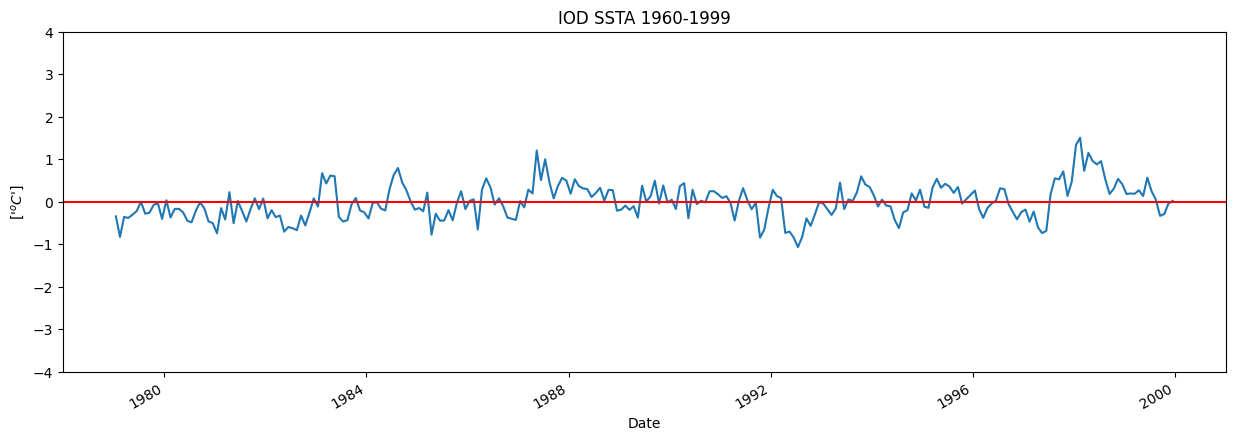

In [ ]:
fig, ax = plt.subplots(1, 1 , figsize=(15,5))
ax.plot(dates_iod, ssta_series)
ax.set_ylim((-4,4))

#horiz_line_data = np.array([0 for i in np.arange(len(dates_n3))])
#ax.plot(dates_n3, horiz_line_data, 'r--')
ax.axhline(0, color='r')

ax.set_title('IOD SSTA 1960-1999')
ax.set_ylabel(['$^oC$'])
ax.set_xlabel('Date')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# use a more precise date string for the x axis locations in the toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y')

The graph shows the time series of Indian Ocean Dipole (IOD) Sea Surface Temperature Anomaly (SSTA) from 1960 to 1999. The x-axis represents the date, while the y-axis represents the SSTA in degrees Celsius (°C).

Here are some key observations from the graph:

* **Oscillations:** The SSTA exhibits clear oscillations, indicating a periodic variation in temperature.
* **Positive and Negative Phases:** The oscillations alternate between positive and negative phases. Positive phases suggest warmer-than-average sea surface temperatures in the western Indian Ocean, while negative phases indicate cooler-than-average temperatures.
* **Amplitude:** The amplitude of the oscillations varies over time. Some periods show larger fluctuations in SSTA compared to others.
* **Mean:** The overall mean of the SSTA appears to be close to zero, suggesting that the average temperature anomaly over the entire period is relatively small.

**Conclusion:**

The graph suggests that the IOD SSTA has experienced significant fluctuations over the period 1960-1999. These fluctuations are likely associated with the El Niño-Southern Oscillation (ENSO) and other climate phenomena. Understanding the dynamics of the IOD is crucial for predicting and mitigating the impacts of climate variability and change in the Indian Ocean region.

**Additional Notes:**

* The red horizontal line at y=0 represents the average SSTA over the entire period.
* The x-axis labels are rotated for better readability.
* The date format is set to display the year for clarity.

## 6. Save Data

In [ ]:
np.savez('/content/drive/MyDrive/Project Learnings/Data/ssta.iod.21y.npz', ssta_series=ssta_series)